# Load the Data:
- https://github.com/wuhan-1222/ASAG/blob/main/ASAG%20Method/dataset/NorthTexasDataset/expand.txt
- https://github.com/Ganesamanian/Computer-Assisted-Short-Answer-Grading-with-Rubrics-using-Active-Learning/blob/master/Dataset/mohler_joined.csv

In [87]:
import pandas as pd
import os

mohler_joined_path = "./mohler_joined.csv"
expand_path = "./expand.txt"

if not os.path.exists(mohler_joined_path):
    raise Exception("File not found error : mohler_joined.csv")

if not os.path.exists(expand_path):
    raise Exception("File not found : expand.txt")


mohler_df = pd.read_csv(mohler_joined_path, index_col=0)
expand_df = pd.read_csv(expand_path, header=None, sep = ",", names=["question", "refanswer", "answer", "score_avg"])

display(mohler_df.head())
display(expand_df.head())


,id,question,refanswer,answer,score_me,score_other,score_avg
0,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,4.0,3.0,3.5
1,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0,5.0,5.0
2,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,5.0,3.0,4.0
3,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0,5.0,5.0
4,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,3.0,3.0


,question,refanswer,answer,score_avg
0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,3.5
1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,4.0
2,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0
3,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To find problem and errors in a program before...,2.0
4,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To address major issues in the creation of the...,2.5


# EDA - Mohler DF

In [88]:
mohler_df_cleaned = mohler_df.copy()

### 1) Find the total number of unique questions in the dataset
- Number of unique ID is not as same as number of question
> To solve this we can re index the id

In [89]:
print("Total number of unique id in the data : ", mohler_df_cleaned["id"].nunique())
print("Total number of unique questions in the data : ", mohler_df_cleaned["question"].nunique())

mohler_df_cleaned["id"] = pd.factorize(mohler_df_cleaned["question"])[0]

print("Total number of unique id in the data After Factorize : ", mohler_df_cleaned["id"].nunique())




Total number of unique id in the data :  81
Total number of unique questions in the data :  79
Total number of unique id in the data After Factorize :  79


### 2) Distribution of frequency of questions
- no need to clip any question as most of the frequency are comparable

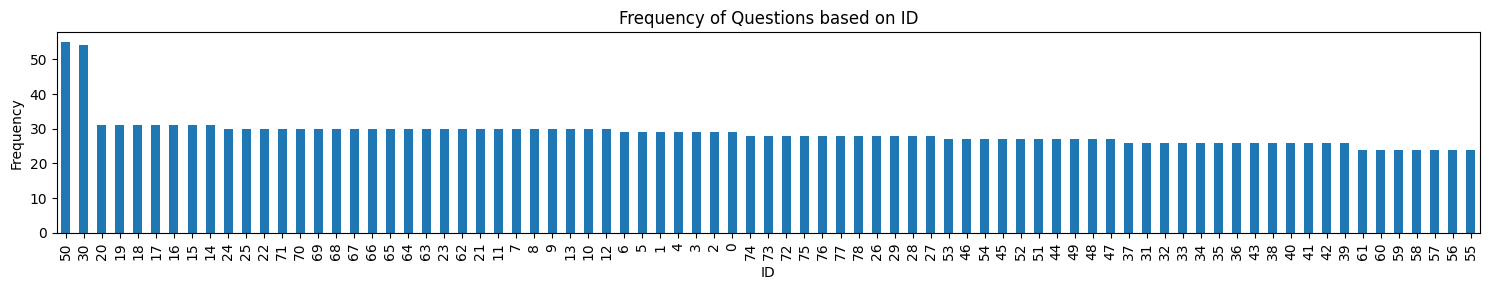

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,3))
mohler_df_cleaned["id"].value_counts().plot(kind="bar", title = "Frequency of Questions based on ID", xlabel="ID", ylabel="Frequency")
plt.tight_layout()
plt.show()


### 3) Frequency of the scores

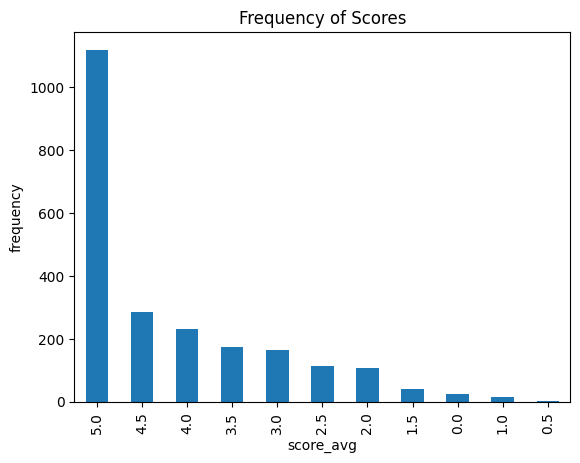

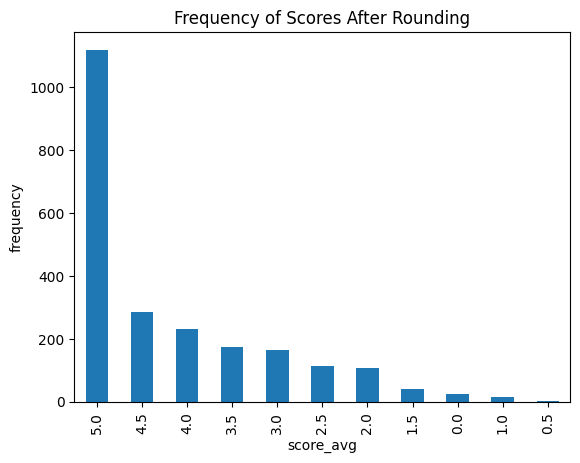

In [93]:
mohler_df_cleaned["score_avg"].value_counts().plot(kind="bar", title="Frequency of Scores", ylabel="frequency")
plt.show()

mohler_df_cleaned["score_avg"] = mohler_df_cleaned["score_avg"].apply(lambda x : round(x*2) / 2)

mohler_df_cleaned["score_avg"].value_counts().plot(kind="bar", title="Frequency of Scores After Rounding", ylabel="frequency")
plt.show()



### 4) remove the score_me and score_other 

In [94]:
mohler_df_cleaned = mohler_df_cleaned.drop(columns=["score_me", "score_other"])
mohler_df_cleaned.head()

,id,question,refanswer,answer,score_avg
0,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,3.5
1,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0
2,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,4.0
3,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0
4,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0


# EDA - expand DF

In [96]:
expand_df_cleaned = expand_df.copy()

### 1) Find unique number of questions and add ID

In [98]:
print("Total number of unique questions in the data : ", expand_df_cleaned["question"].nunique())

expand_df_cleaned["id"] = pd.factorize(expand_df_cleaned["question"])[0]
expand_df_cleaned.head()

Total number of unique questions in the data :  85


,question,refanswer,answer,score_avg,id
0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,3.5,0
1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,4.0,0
2,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,0
3,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To find problem and errors in a program before...,2.0,0
4,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To address major issues in the creation of the...,2.5,0


### 2) Distribution of frequency of questions


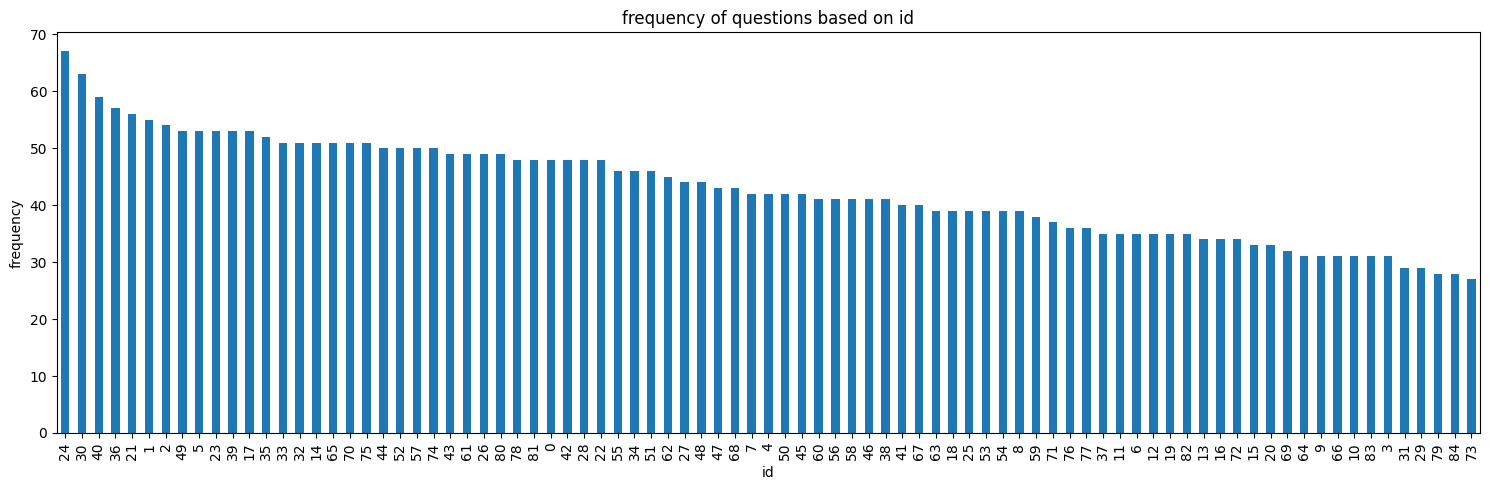

In [102]:
plt.figure(figsize=(15, 5))
expand_df_cleaned["id"].value_counts().plot(kind="bar", xlabel="id", ylabel="frequency", title="frequency of questions based on id")
plt.tight_layout()
plt.show()

### 3) Distribution of scores
- There are more 5.0 scores

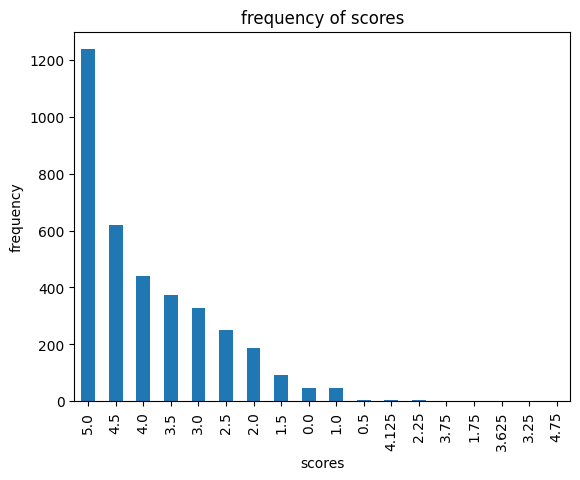

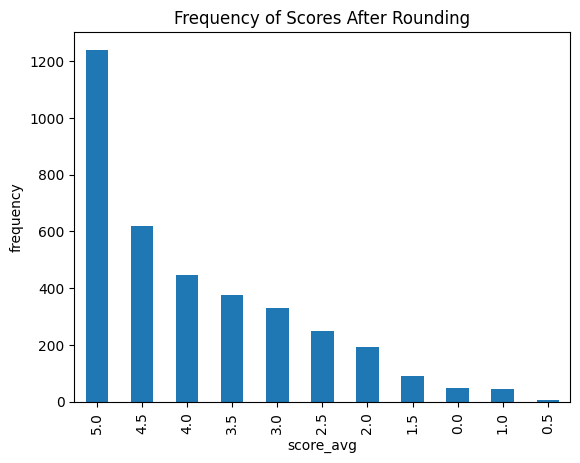

In [105]:
expand_df_cleaned["score_avg"].value_counts().plot(kind="bar", xlabel="scores", ylabel="frequency", title="frequency of scores")
plt.show()
expand_df_cleaned["score_avg"] = expand_df_cleaned["score_avg"].apply(lambda x : round(x*2) / 2)

expand_df_cleaned["score_avg"].value_counts().plot(kind="bar", title="Frequency of Scores After Rounding", ylabel="frequency")
plt.show()


# Combining the dataset

In [110]:
final_df = pd.concat([mohler_df_cleaned, expand_df_cleaned])

print("total number of unique questions in the data : ",final_df["question"].nunique())
print("total number of rows in the data : ", len(final_df))
# refactorize
final_df["id"] = pd.factorize(final_df["question"])[0]
final_df.head()

total number of unique questions in the data :  164
total number of rows in the data :  5919


,id,question,refanswer,answer,score_avg
0,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,3.5
1,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0
2,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,4.0
3,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0
4,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0


# Save

In [111]:
final_df.to_csv('data.csv', index=False)


In [116]:
final_df_ = pd.read_csv("data.csv")
final_df_

,id,question,refanswer,answer,score_avg
0,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,3.5
1,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0
2,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,4.0
3,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0
4,0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0
...,...,...,...,...,...
5914,163,What data structure is more appropriate for sc...,a queue otherwise some things would never be p...,a queue,5.0
5915,163,What data structure is more appropriate for sc...,a queue otherwise some things would never be p...,Queue,5.0
5916,163,What data structure is more appropriate for sc...,a queue otherwise some things would never be p...,i would say that a queue is better because the...,5.0
5917,163,What data structure is more appropriate for sc...,a queue otherwise some things would never be p...,a queue because you want the jobs to execute i...,5.0


In [132]:
print("question : ", final_df.loc[0,"question"].values[0])
print("ref_answer : ", final_df.loc[0, "refanswer"].values[0])
print("student_answer : ", final_df.loc[0, "answer"].values[0])
print("score : ", final_df.loc[0, "score_avg"].values[0])

question :  What is the role of a prototype program in problem solving?
ref_answer :  To simulate the behaviour of portions of the desired software product. 
student_answer :  High risk problems are address in the prototype program to make sure that the program is feasible.  A prototype may also be used to show a company that the software can be possibly programmed.  
score :  3.5


In [ ]:
result = get_completion(query='''Lieber Thomas!
Jetzt bist du weit weg! Ich bin sehr unglücklich! Wie geht es dir in Hamburg? Hast du nette Kollegen in der Bank? Ist der Chef nett? Hast du schon eine Wohnung? Ist die Wohnung teuer? Ich arbeite schon zwei Wochen im Goethe-Gymnasium in München.

Die Kollegen und Kolleginnen sind sehr freundlich. Die Schülerinnen und Schüler sind auch sehr nett. München ist schön! Das Wetter ist gut. Aber meine Katze "Mimi" ist krank! Das ist schrecklich. Heute Abend gehe ich ins Theater.

Herzliche Grüße''', model=model, tokenizer=tokenizer)
print(result)It is not able to translate the german to english 